# 2020 Portugal Stata Conference | Porto | 25 January

# Stata sample exercise using Jupyter Notebook

**M Portela**

### Here are some notes on the configuration on the stata kernel

The main source of information of information is available [here](https://kylebarron.dev/stata_kernel/)

You will nedd to have both Python and Stata installed. In the current exercise I am using macOS Catalina + Python 3.8 + Stata 16.0.

My configuration file is located in my home folder, ~, .stata_kernel.conf, and reads

![stata_kernel.conf](figures/fig_stata_kernel_conf.png)



## 1. Configuration

In [1]:
%set execution_mode console

In [12]:
%set graph_format svg --permanently

In [13]:
%set autocomplete_closing_symbol True

## 2. Change working directory

In [14]:
cd "/Users/miguelportela/Dropbox/1.miguel/1.formacao/jupyter/stata_full_exercise/logs"

/Users/miguelportela/Dropbox/1.miguel/1.formacao/jupyter/stata_full_exercise/logs


## 3. Some *magics*

In [15]:
//%help magics

In [16]:
//%help histogram

## 4. Read data

In [11]:
//webuse nlswork
//save ../data/nlswork, replace

di "Stata Version"

version

python
import pandas as pd
2+2

pd.__version__

end



Stata Version

version 16.0

----------------------------------------------- python (type end to exit) -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

>>> 2+2
4
>>> pd.__version__
'0.25.3'
>>> end
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## 5. Explore the data

** olá **

In [18]:
clear all
set rmsg off
sysuse nlsw88, clear




(NLSW, 1988 extract)


In [1]:
version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.0                         
year           2020                        
month          04                          
day            24                          
svn rev        78286                       
language       R                           
version.string R version 4.0.0 (2020-04-24)
nickname       Arbor Day                   

In [19]:
%head 5

,idcode,age,race,married,never_married,grade,collgrad,south,smsa,c_city,industry,occupation,union,wage,hours,ttl_exp,tenure
1,1,37,black,single,0,12,not college grad,0,SMSA,0,Transport/Comm/Utility,Operatives,union,11.739125,48,10.333334,5.3333335
2,2,37,black,single,0,12,not college grad,0,SMSA,1,Manufacturing,Craftsmen,union,6.4009633,40,13.621795,5.25
3,3,42,black,single,1,12,not college grad,0,SMSA,1,Manufacturing,Sales,.,5.0167227,40,17.73077,1.25
4,4,43,white,married,0,17,college grad,0,SMSA,0,Professional Services,Other,union,9.0338125,42,13.211537,1.75
5,6,42,white,married,0,12,not college grad,0,SMSA,0,Manufacturing,Operatives,nonunion,8.0837307,48,17.820513,17.75


In [20]:
codebook, compact


Variable       Obs Unique      Mean       Min       Max  Label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
idcode        2246   2246  2612.654         1      5159  NLS id
age           2246     13  39.15316        34        46  age in current year
race          2246      3  1.282725         1         3  race
married       2246      2  .6420303         0         1  married
never_marr~d  2246      2  .1041852         0         1  never married
grade         2244     16  13.09893         0        18  current grade completed
collgrad      2246      2  .2368655         0         1  college graduate
south         2246      2  .4194123         0         1  lives in south
smsa          2246      2  .7039181         0         1  lives in SMSA
c_city        2246      2  .2916296        

In [21]:
ren ttl_exp exper
gen exper2 = exper^2

In [22]:
label var exper "Experience sqr."

In [23]:
gen ln_wage = ln(wage)

### 5.2 Summary statistics

In [24]:
sum ln_wage, detail


                           ln_wage
-------------------------------------------------------------
      Percentiles      Smallest
 1%     .6580342       .0049396
 5%     1.029977       .0317383
10%     1.169571        .140951       Obs               2,246
25%     1.449095       .2961002       Sum of Wgt.       2,246

50%     1.836138                      Mean           1.868645
                        Largest       Std. Dev.        .57458
75%     2.261495       3.693819
90%     2.547707       3.693819       Variance       .3301421
95%     2.805164       3.693819       Skewness       .4320313
99%     3.656079       3.707372       Kurtosis       3.570247


In [25]:
tab south union


  lives in |     union worker
     south |  nonunion      union |     Total
-----------+----------------------+----------
         0 |       754        325 |     1,079 
         1 |       663        136 |       799 
-----------+----------------------+----------
     Total |     1,417        461 |     1,878 


In [26]:
tabstat wage,by(union) stat(N mean sd p1 p50 p99)


Summary for variables: wage
     by categories of: union (union worker)

   union |         N      mean        sd        p1       p50       p99
---------+------------------------------------------------------------
nonunion |      1417  7.204669  4.103694  1.972624  6.191625  22.36715
   union |       461  8.674294  4.174539   2.73752   8.05153   25.1606
---------+------------------------------------------------------------
   Total |      1878  7.565423  4.168369  2.012882  6.602252  22.58453
----------------------------------------------------------------------


### 5.3 Graphs

(bin=33, start=.11538462, width=.87179486)


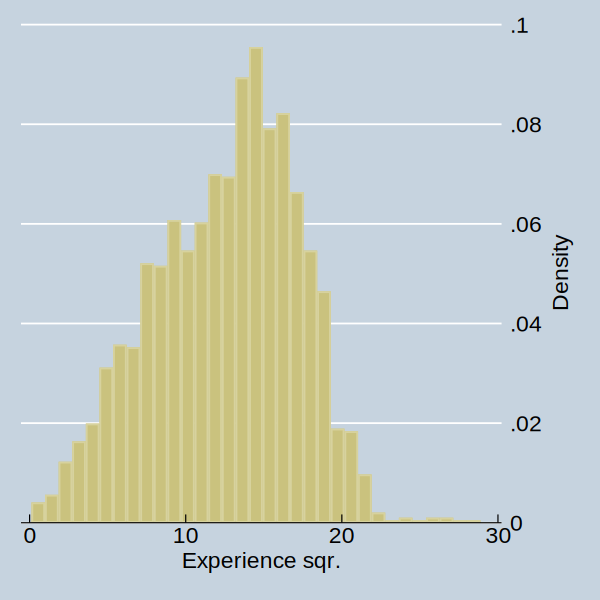

In [27]:
histogram exper,scheme(economist)

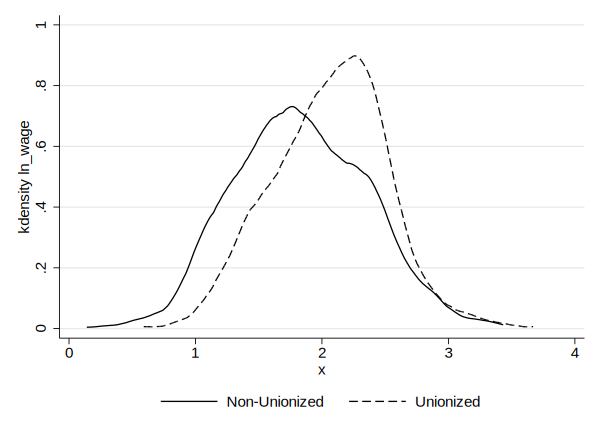

In [28]:
twoway (kdensity ln_wage if union == 0) (kdensity ln_wage if union == 1),scheme(sj) graphregion(color(white)) legen(region(color(white)) order(1 "Non-Unionized" 2 "Unionized"))

## 6. Regression analysis

The model to be estimated is defined by

$Ln \_ Wage_i = \beta_0 + \beta_1 Union_i + \beta_2 Collgrad_i + \beta_3 Exper_i + \beta_4 Exper^{2}_i + \varepsilon_i$

where $Ln \_ Wage_i$ stands for log wage, $\ldots$

In [29]:
eststo m1: regress ln_wage union
local b_union = _b[union]



      Source |       SS           df       MS      Number of obs   =     1,878
-------------+----------------------------------   F(1, 1876)      =     68.08
       Model |   17.596732         1   17.596732   Prob > F        =    0.0000
    Residual |    484.8574     1,876  .258452772   R-squared       =    0.0350
-------------+----------------------------------   Adj R-squared   =    0.0345
       Total |  502.454132     1,877  .267690001   Root MSE        =    .50838

------------------------------------------------------------------------------
     ln_wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       union |   .2249202   .0272586     8.25   0.000     .1714599    .2783805
       _cons |    1.83456   .0135053   135.84   0.000     1.808073    1.861047
------------------------------------------------------------------------------



In [30]:
%locals

b_union: .2249201768140178


In [31]:
quiet eststo m2: regress ln_wage collgrad exper exper2 union

In [32]:
quiet eststo m3: regress ln_wage collgrad exper exper2 union south

In [33]:
esttab m1 m2 m3,b(%4.3f) se(%4.3f) nocons r2 aic(%5.0f)


------------------------------------------------------------
                      (1)             (2)             (3)   
                  ln_wage         ln_wage         ln_wage   
------------------------------------------------------------
union               0.225***        0.165***        0.132***
                  (0.027)         (0.023)         (0.023)   

collgrad                            0.357***        0.358***
                                  (0.023)         (0.023)   

exper                               0.077***        0.080***
                                  (0.010)         (0.009)   

exper2                             -0.001***       -0.001***
                                  (0.000)         (0.000)   

south                                              -0.190***
                                                  (0.020)   
------------------------------------------------------------
N                    1878            1878            1878   
R-sq               

Estimations from model (3) indicate that, conditional on Education, Experience and Location, Unionized workers have a premium of about 13%.

# A complete exercise

## First specifications

In [34]:
version
clear all // CLEAR STATA'S MEMORY; START A NEW SESSION
set more off // ALLOW SCREENS TO PASS BY
set rmsg on // CONTROL THE TIME NEEDED TO RUN EACH COMMAND

capture restore

timer on 1

capture cd "/Users/miguelportela/Dropbox/1.miguel/1.formacao/jupyter/stata_full_exercise/logs"


version 16.0



r; t=0.00 8:27:31

r; t=0.00 8:27:31

r; t=0.00 8:27:31

r; t=0.00 8:27:31

. r; t=0.00 8:27:31


## Start a command log to register everything you type interactively

In [35]:
capture cmdlog close
capture cmdlog using commands.txt, replace

r; t=0.00 8:27:31

r; t=0.00 8:27:31

r; t=0.00 8:27:31

. r; t=0.00 8:27:31


## Start a log file for the output

In [36]:
capture log close
log using exercise_complete_output.txt, text replace

r; t=0.00 8:27:31

r; t=0.00 8:27:31

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/miguelportela/Dropbox/1.miguel/1.formacao/jupyter/stata_full_exercise/logs/exercise_complete_output.txt
  log type:  text
 opened on:  17 Feb 2020, 08:27:31
r; t=0.00 8:27:31

. r; t=0.00 8:27:31


## Build the data

We will use the 3 datasets discussed under section "handling data", namely income, education and capital data at the country level

### Explore the three data files

#### INCOME

In [37]:
use ../data/income, clear
describe
codebook, compact
inspect openk
sum
sum rgdpwok, detail

lookfor GDP

order isocode,before(year)
des
list country isocode year in 1/10
assert (year >= 1950 & year <= 2010)
// assert pop >0 & pop ~= .
// ssc install unique
unique year
unique country

r; t=0.00 8:27:31

r; t=0.00 8:27:31


Contains data from ../data/income.dta
  obs:        11,340                          
 vars:            12                          24 Jan 2017 09:53
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
country         str24   %24s                  Country name
year            int     %10.0g                Year of observation
isocode         str3    %9s                   Country code
pop           

#### EDUCATION

In [38]:
use ../data/education, clear
describe
codebook, compact
inspect education
sum education, detail

unique year
unique country

// IDENTIFY DUPLICATES

duplicates tag country,gen(dup)
tab dup
list if dup == 0
drop dup

tabstat education,by(country) stat(mean sd min p10 p50 p90 p99)

logout, save(tabstat_education_country) excel word replace: tabstat education,by(country) stat(mean sd min p10 p50 p90 p99)

// the command logout closes the log, so one has to open it with the option append
log using exercise_complete_output.txt, text append

r; t=0.00 8:27:32

r; t=0.00 8:27:32


Contains data from ../data/education.dta
  obs:         1,086                          
 vars:             3                          24 Jan 2017 09:53
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
country         str31   %31s                  country
year            int     %10.0g                year
education       double  %10.0g                education
----------------------------------

#### CAPITAL

In [39]:
use ../data/capital, clear
describe

// browse the data using the command 'browse' to explore its features
// key conclusion: one needs to reshape the data

reshape long k,i(country) j(year)
describe

// as k, for capital, is a string, one needs to make it a number

destring k, replace force // type 'help destring' to understand the option force

rename k capital

label var capital "Total capital per country"

codebook, compact
inspect capital
sum capital, detail
unique year
unique country

sort country year

preserve
drop if capital == . // drop observations that satisfy the condition
list in 1/10
tab country
restore

save ../data/data_capital_long, replace


r; t=0.00 8:27:33

r; t=0.00 8:27:33


Contains data from ../data/capital.dta
  obs:            63                          
 vars:            46                          24 Jan 2017 09:53
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
country         str23   %23s                  
k1948           str10   %10s                  
k1949           str10   %10s                  
k1950           str17   %17s                  
k1951    

### combine the three data sets and save the data for the following analysis

In [40]:
use ../data/income
merge 1:1 country year using ../data/education
drop _merge

merge 1:1 country year using ../data/data_capital_long
drop _merge

egen rmiss = rowmiss(rgdpwok education)
tab rmiss
keep if rmiss == 0
drop rmiss

save ../data/data_full, replace

// if your co-author uses Stata version 13 you need to save the data file in the old format

saveold ../data/data_full_stata_version13, replace version(13)

r; t=0.00 8:27:33

r; t=0.00 8:27:33

(note: variable country was str24, now str31 to accommodate using data's values)

    Result                           # of obs.
    -----------------------------------------
    not matched                        10,568
        from master                    10,411  (_merge==1)
        from using                        157  (_merge==2)

    matched                               929  (_merge==3)
    -----------------------------------------
r; t=0.02 8:27:33

r; t=0.00 8:27:33


    Result                           # of obs.
    -----------------------------------------
    not matched                         9,430
        from master                     9,046  (_merge==1)
        from using                        384  (_merge==2)

    matched                             2,451  (_merge==3)
    -----------------------------------------
r; t=0.03 8:27:33

r; t=0.00 8:27:33

r; t=0.01 8:27:33


      rmiss |      Freq.     Percent        Cum.
--------

## 2. explore the data

### 2.1 Exploratory Data Analysis

In [41]:
use ../data/data_full, clear
describe
codebook, compact
inspect rgdpwok education capital
tab country year if year >= 1990 & year <= 2000
tab country year if year >= 1990 & year <= 2000,sum(education)

r; t=0.00 8:27:33

r; t=0.00 8:27:33


Contains data from ../data/data_full.dta
  obs:           857                          
 vars:            14                          17 Feb 2020 08:27
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
country         str31   %31s                  Country name
year            int     %10.0g                Year of observation
isocode         str3    %9s                   Country code
pop        

### 2.2 generate variables, label values, etc.

r; t=0.00 8:27:34

r; t=0.00 8:27:34

(623 missing values generated)
r; t=0.00 8:27:34

r; t=0.00 8:27:34

r; t=0.00 8:27:34

r; t=0.00 8:27:34

r; t=0.00 8:27:34


                     Degree of openness
-------------------------------------------------------------
      Percentiles      Smallest
 1%     7.768206       2.319838
 5%     12.96987       2.330925
10%     18.77767       2.514998       Obs                 857
25%     29.91408       3.540735       Sum of Wgt.         857

50%     49.19247                      Mean           62.85651
                        Largest       Std. Dev.      52.17845
75%     75.60732        335.939
90%     126.0015       346.3693       Variance       2722.591
95%     159.1463       393.9669       Skewness       2.484958
99%     290.2023       395.9767       Kurtosis       11.98879
r; t=0.00 8:27:34


scalars:
                  r(N) =  857
              r(sum_w) =  857
               r(mean) =  62.85651003354628
                r(Var) =  2722.591043

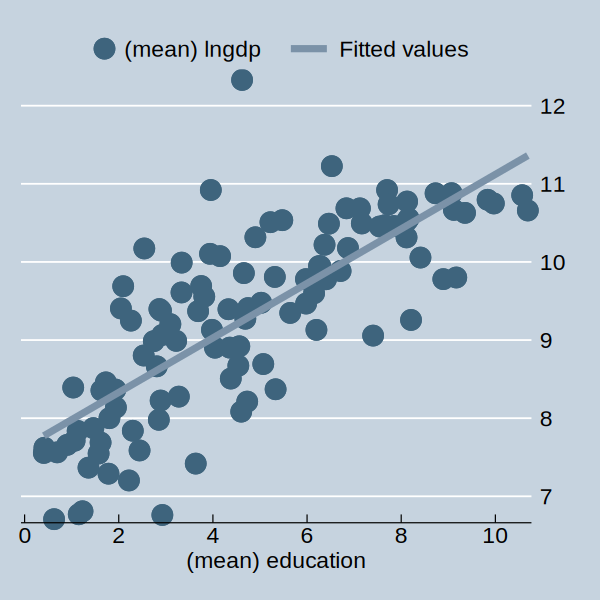



r; t=0.01 8:27:36
r; t=0.00 8:27:36
r; t=0.02 8:27:36

r; t=0.00 8:27:36

r; t=0.12 8:27:36


     +------------------+
     |   country   year |
     |------------------|
  1. |  Zimbabwe   1960 |
  2. |  Zimbabwe   1965 |
  3. |  Zimbabwe   1970 |
  4. |  Zimbabwe   1975 |
  5. |  Zimbabwe   1980 |
     |------------------|
  6. |  Zimbabwe   1985 |
  7. |  Zimbabwe   1990 |
  8. |  Zimbabwe   1995 |
  9. |  Zimbabwe   2000 |
 10. |    Zambia   1960 |
     |------------------|
 11. |    Zambia   1965 |
 12. |    Zambia   1970 |
 13. |    Zambia   1975 |
 14. |    Zambia   1980 |
 15. |    Zambia   1985 |
     |------------------|
 16. |    Zambia   1990 |
 17. |    Zambia   1995 |
 18. |    Zambia   2000 |
 19. | Venezuela   1950 |
 20. | Venezuela   1960 |
     +------------------+
r; t=0.00 8:27:36

r; t=0.03 8:27:36


     +--------------------+
     |     country   year |
     |--------------------|
  1. | Afghanistan   1970 |
  2. | Afghanistan   1975 |
  3. | Afghanistan   19

In [42]:
generate lngdp = ln(rgdpwok)
ge lnk = ln(capital)

label var rgdpwok "Real GDP per worker"
label var education "Education (in years)"
label var capital "Capital"
label var open "Degree of openness"

sum open, detail
return list

format %5.2f open
l open in 1/10

format %5.3f open
sum open
sum open, format

gen high_open = (open > r(p50) & open ~= .)
label define lbl_openh 0 "Low openness"  1 "High openness"
label values high_open lbl_openh
tab high_open

// one could replace the values under 'high_open' with 10 & 20

clonevar high_open_tmp = high_open
recode high_open_tmp 0 = 10 1 = 20
tab high_open_tmp
drop high_open_tmp

encode country, gen(country_n)
tab country_n if high_open == 1
tab country_n if high_open == 1, nolabel

label dir
label list country_n

bysort country: gen nobs_1 = _N
egen nobs_2 = count(year),by(country)

compare nobs_1 nobs_2
drop nobs*

foreach nn of numlist 1985(5)2000 {

display _new _new "YEAR: `nn'" _new
preserve
keep if year == `nn'
tabstat education,by(high_open) stat(mean sd p10 p50 p90 p99)
restore

}

// within variable transformation/correction
replace country = proper(country) // replace within variable 'country' all country names with caps in the first letter

preserve

contract country
drop _freq
list in 1/10

restore

// explore Stata's functions, type help functions
// play with string functions, substr, word, regexr

replace country = regexr(country,"Spain","Espanha")

local cc = "Portugal Espanha"

foreach asd of local cc {

di _new _new "COUNTRY:`asd'" _new

preserve
keep if country == "`asd'"
sum education if year >= 1990, detail
restore

}

preserve

// use just one data point per country

collapse (mean) lngdp education,by(country)
count
codebook, compact

scatter lngdp education || lfit lngdp education, scheme(economist)
//graph export ../text/gdp_education.png, replace

restore

// sort the data

gsort -country +year
list country year in 1/20

sort country year
list country year if _n <15

// create a variable that tracks changes in gdp over time within

bysort country (year): gen delta_gdp = lngdp - lngdp[_n - 1]
list country year lngdp delta_gdp in 1/15

// this is not the efficient/correct way to do it; latter we will use 'tsset'

### 2.3 export the descriptive statistics

#### 2.3.a logout

In [43]:
//ssc install outreg2

replace capital = capital/1000000

preserve
    keep rgdpwok education capital open
    order rgdpwok education capital open
    outreg2 using ../text/summary_statistics_table.doc, auto(4) sum(detail) word tex eqkeep(N mean p99 sd min max) dec(3) replace label
restore

r; t=0.00 8:27:37

(234 real changes made)
r; t=0.00 8:27:37

r; t=0.00 8:27:37

r; t=0.00 8:27:37

r; t=0.00 8:27:37


                     Real GDP per worker
-------------------------------------------------------------
      Percentiles      Smallest
 1%      820.097       396.7613
 5%     1470.394       680.4185
10%     1967.046       688.3165       Obs                 857
25%     4362.333       689.6256       Sum of Wgt.         857

50%     12840.54                      Mean           19901.78
                        Largest       Std. Dev.      21470.14
75%     30059.78       85669.11
90%     49808.75       96111.57       Variance       4.61e+08
95%     58815.88         188886       Skewness       3.177364
99%     74706.38       271192.1       Kurtosis       28.43526

                    Education (in years)
-------------------------------------------------------------
      Percentiles      Smallest
 1%          .19            .04
 5%          .69            .07
10%         1.

#### 2.3.b logout

In [44]:
logout, save(tabstat_education_country) tex replace: tabstat education,by(country) stat(mean sd min p5 p50 p90 p99)

// the command logout closes the log, so one has to open it with the option append
log using exercise_complete_output.txt, text append

r; t=0.00 8:27:38



Summary for variables: education
     by categories of: country (Country_name)

         country |      mean        sd       min        p5       p50       p90       p99
-----------------+----------------------------------------------------------------------
     Afghanistan |  .9057143  .1679144       .73       .73       .87      1.14      1.14
         Algeria |  2.094444  1.471845       .65       .65      1.55      4.72      4.72
       Argentina |     6.403  1.394673      4.36      4.36      6.25     8.305      8.49
       Australia |  9.967778   .401428       9.3       9.3     10.06     10.57     10.57
         Austria |  7.732222  .8443752      6.71      6.71      8.22       8.8       8.8
         Bahrain |  3.955714  1.611675      1.82      1.82      3.78      6.09      6.09
      Bangladesh |  1.572222  .6851966       .79       .79      1.68      2.45      2.45
        Barbados |  7.653333  1.545971      5.22      5.22      8.19      9.11      9.11
         

#### 2.3.c estout

In [45]:
label var year "Year"
tabout year using ../text/summary_statistics_2.tex, ///
cells(N pop mean pop mean openk mean rgdpwok mean education mean lngdp median lnk median delta_gdp) ///
sum style(tex) replace ptotal(single) oneway f(0c 1c 1c 1c 1c 1p 1c 2p) ///
h1(nil) h2( & & \multicolumn{5}{c}{Means} & \multicolumn{2}{|c}{Medians} \\ \hline) ///
h3(& Obs. & Pop. & OpenK & GDP & Education & ln GDP & ln Capital & $\Delta_{GDP}$ \\) botf() botstr("Source: own computations.")

r; t=0.00 8:27:38

r; t=0.00 8:27:38


Table output written to: ../text/summary_statistics_2.tex

& & \multicolumn{5}{c}{Means} & \multicolumn{2}{|c}{Medians} \\ \hline
& Obs. & Pop. & OpenK & GDP & Education & ln GDP & ln Capital & $\Delta_{GDP}$ \\
\hline
Year&&&&&&&& \\
1950&16&27,877.8&35.5&10,744.6&3.4&9.1\%&& \\
1955&2&13,162.5&49.0&9,727.7&5.0&8.8\%&&0.28\% \\
1960&78&21,242.5&49.5&11,999.7&3.6&8.9\%&&0.24\% \\
1965&79&23,208.5&51.2&14,346.9&3.6&9.1\%&&0.18\% \\
1970&95&22,366.0&58.4&18,371.2&3.9&9.2\%&24.7&0.16\% \\
1975&96&34,289.6&59.0&18,179.0&4.1&9.3\%&25.0&0.11\% \\
1980&97&36,974.5&64.6&23,061.3&4.7&9.4\%&25.3&0.12\% \\
1985&96&40,684.6&61.6&20,407.0&5.0&9.4\%&25.2&0.01\% \\
1990&101&42,267.4&66.5&21,947.4&5.5&9.4\%&25.5&0.06\% \\
1995&99&46,936.5&73.8&23,535.4&5.9&9.4\%&&0.03\% \\
2000&98&50,089.0&80.4&26,142.1&6.3&9.5\%&&0.07\% \\
\hline
Total&857&35,818.0&62.9&19,901.8&4.8&9.3\%&25.2&0.09\% \\
r; t=0.23 8:27:39

. r; t=0.24 8:27:39


### 2.4 export key graphs

#### 2.4.a densities

r; t=0.00 8:27:39
r; t=1.00 8:27:40


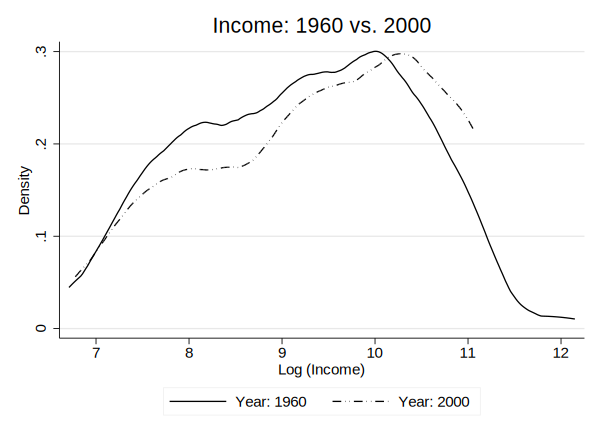



r; t=0.00 8:27:40
r; t=0.00 8:27:40
r; t=0.02 8:27:40


In [46]:
twoway (kdensity lngdp if year == 1970) || (kdensity lngdp if year == 1990, lpattern(dash_dot_dot)), ///
legend(label(1 "Year: 1960") label(2 "Year: 2000") region(lwidth(none))) title(Income: 1960 vs. 2000) ///
xtitle("Log (Income)") ytitle("Density") scheme(sj) graphregion(color(white)) bgcolor(white)

//graph export ../text/income_density.png, replace

#### 2.4.b 'dots'

r; t=0.00 8:27:40


                    Education (in years)
-------------------------------------------------------------
      Percentiles      Smallest
 1%          .76            .76
 5%         1.91            .82
10%         2.23           1.14       Obs                  98
25%         4.42           1.19       Sum of Wgt.          98

50%         6.09                      Mean           6.291735
                        Largest       Std. Dev.      2.843706
75%         8.53          11.43
90%          9.9          11.52       Variance       8.086662
95%        11.36          11.86       Skewness      -.0281713
99%        12.25          12.25       Kurtosis       2.172931
r; t=0.00 8:27:40

r; t=0.00 8:27:40

r; t=0.00 8:27:40

r; t=0.00 8:27:40

r; t=1.27 8:27:41


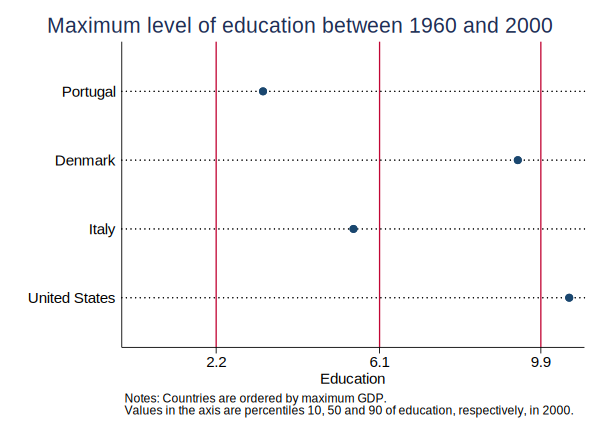



r; t=0.03 8:27:41
r; t=0.00 8:27:41
r; t=0.06 8:27:41

(file ../text/example1.eps written in EPS format)
r; t=0.04 8:27:41

. r; t=1.38 8:27:41


In [47]:
sum education if year == 2000,detail

global a = r(p50)
global b = r(p10)
local c = r(p90)

graph dot (mean) education if (country == "Denmark" | country == "Portugal" | country == "United States" | country == "Italy" | country == "Spain"),over(country, sort((max) lngdp)) ///
title("Maximum level of education between 1960 and 2000", span) ///
note("Notes: Countries are ordered by maximum GDP." "Values in the axis are percentiles 10, 50 and 90 of education, respectively, in 2000.") ///
ytitle("Education") yline($a $b `c') ylabel($a $b `c',format(%3.1g)) ///
graphregion(color(white)) bgcolor(white) scheme(s2color)

graph export ../text/example1.eps, replace

## 3. regression analysis

### 3.1 Regressions

In [48]:
encode country,ge(cty_id)

xtset cty_id year

reg lngdp education
estimates store r1

reg lngdp education lnk
est store r2

reg lngdp education lnk openk i.year // use the operator i. to produce time dummies
est store r3

xtreg lngdp education lnk openk i.year, fe
est store fe

xtreg lngdp education lnk openk i.year, be
est store be

xtreg lngdp education lnk openk i.year,re
est store re

r; t=0.00 8:27:41

r; t=0.00 8:27:42

       panel variable:  cty_id (unbalanced)
        time variable:  year, 1950 to 2000, but with gaps
                delta:  1 unit
r; t=0.01 8:27:42


      Source |       SS           df       MS      Number of obs   =       857
-------------+----------------------------------   F(1, 855)       =   1173.23
       Model |  713.696014         1  713.696014   Prob > F        =    0.0000
    Residual |  520.110021       855  .608315814   R-squared       =    0.5785
-------------+----------------------------------   Adj R-squared   =    0.5780
       Total |  1233.80604       856  1.44136219   Root MSE        =    .77995

------------------------------------------------------------------------------
       lngdp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   education |   .3168632   .0092508    34.25   0.000     .2987062    .3350201
       _cons |   7

### 3.2 export the regression output

#### 3.2.a export the output to word with 'outreg'

In [49]:
outreg, clear
estimates restore r1
outreg using ../text/growth_analysis, replace rtitles("Education" \ "" \ "Capital" \ "" \ "Openness degree" \ "")  /*
*/ drop(_cons) /*
*/ ctitle("","Simple model") /*
*/ nodisplay varlabels bdec(3) se starlevels(10 5 1) starloc(1) summstat(r2\rmse \ N) summtitle("R2"\"RMSE" \ "N")

estimates restore r2
outreg using ../text/growth_analysis, merge rtitles("Education" \ "" \ "Capital" \ "" \ "Openness degree" \ "")  /*
*/ drop(_cons) /*
*/ ctitle("","Include capital") /*
*/ nodisplay varlabels bdec(4) se starlevels(10 5 1) starloc(1) summstat(r2\rmse \ N) summtitle("R2"\"RMSE" \ "N")

estimates restore r3
outreg using ../text/growth_analysis, merge rtitles("Education" \ "" \ "Capital" \ "" \ "Openness degree" \ "")  /*
*/ drop(_cons 1975.year 1980.year 1985.year 1990.year) /*
*/ ctitle("","Full model") /*
*/ varlabels bdec(4) se starlevels(10 5 1) starloc(1) summstat(r2\rmse \ N) summtitle("R2"\"RMSE" \ "N")

r; t=0.00 8:27:42

r; t=0.10 8:27:42

(results r1 are active now)
r; t=0.00 8:27:42

r; t=0.16 8:27:43

(results r2 are active now)
r; t=0.00 8:27:43

r; t=0.00 8:27:43

(results r3 are active now)
r; t=0.01 8:27:43


                                                                                                --------------------------------------------------------------
                                                                                                                   Simple model  Include capital  Full model 
                                                                                                --------------------------------------------------------------
                                                                                                 Education           0.317***       0.2117***     0.2137***  
                                                                                                                     (0.009)        (0.0201)       (

#### 3.2.b export the output to word using 'esttab'

In [50]:
// ssc install estout

esttab r1 r2 r3 fe re using ../text/growth_analysis_esttab.doc, replace ///
keep(education lnk openk) ///
mtitle("Model # 1" "Model (2)" "Model (3)") nonumbers ///
coeflabel (education "Average education" lnk "Log capital" openk "Openness") ///
b(%5.3f) se(%5.3f) sfmt(%5.2f) star(* 0.1 ** 0.05 *** 0.01) ///
scalars("N Observations" "r2 R$^2$" "rmse RMSE") ///
nonotes addnotes("Notes: standard errors in parenthesis. Significance levels: *, 10\%;" "**, 5\%; ***, 1\%. The dependent variable is ln real GDP per workers." "Source: own computations.")

r; t=0.00 8:27:43
(output written to ../text/growth_analysis_esttab.doc)
r; t=0.07 8:27:43


### 3.3 export to LATEX, 3 options

#### 3.3.a export the output to latex using 'esttab'

In [51]:
esttab r1 r2 r3 fe be re using ../text/growth_analysis_esttab.tex, replace ///
keep(education lnk openk) ///
mtitle("OLS (1)" "OLS (2)" "OLS (3)" "FE" "BE" "RE") nonumbers ///
coeflabel (education "Average education" lnk "Log capital" openk "Openness") ///
b(%5.3f) se(%5.3f) sfmt(%7.2f) star(* 0.1 ** 0.05 *** 0.01) ///
scalars("N Observations" "r2 R$^2$" "rmse RMSE") ///
nonotes addnotes("Notes: standard errors in parenthesis. Significance levels: *, 10\%; **, 5\%; ***, 1\%." "The dependent variable is ln real GDP per worker. All models include a constant." "Models OLS (3) till RE include time dummies." "Source: own computations.")

r; t=0.00 8:27:43
(output written to ../text/growth_analysis_esttab.tex)
r; t=0.07 8:27:43


#### 3.3.b export the output to latex FRAGMENT: use \input{growth_analysis_frag} to include it in your tex file

In [52]:
outreg, clear
estimates restore r1
outreg using ../text/growth_analysis_frag, tex fragment replace rtitles("Education" \ "" \ "Capital" \ "" \ "Openness degree" \ "")  /*
*/ drop(_cons) /*
*/ ctitle("","Simple model") /*
*/ nodisplay varlabels bdec(4) se starlevels(10 5 1) starloc(1) summstat(r2\rmse \ N) summtitle("R2"\"RMSE" \ "N")

estimates restore r2
outreg using ../text/growth_analysis_frag, tex fragment merge rtitles("Education" \ "" \ "Capital" \ "" \ "Openness degree" \ "")  /*
*/ drop(_cons) /*
*/ ctitle("","Include capital") /*
*/ nodisplay varlabels bdec(3) se starlevels(10 5 1) starloc(1) summstat(r2\rmse \ N) summtitle("R2"\"RMSE" \ "N")

estimates restore r3
outreg using ../text/growth_analysis_frag, tex fragment merge rtitles("Education" \ "" \ "Capital" \ "" \ "Openness degree" \ "")  /*
*/ drop(_cons 1975.year 1980.year 1985.year 1990.year) /*
*/ ctitle("","Full model") /*
*/ nodisplay varlabels bdec(1) se starlevels(10 5 1) starloc(1) summstat(r2\rmse \ N) summtitle("R2"\"RMSE" \ "N")

r; t=0.00 8:27:43

r; t=0.00 8:27:43

(results r1 are active now)
r; t=0.00 8:27:43

r; t=0.00 8:27:43

(results r2 are active now)
r; t=0.02 8:27:43

r; t=0.00 8:27:43

(results r3 are active now)
r; t=0.01 8:27:43

r; t=0.00 8:27:43

. r; t=0.05 8:27:43


#### 3.3.c export the output to latex FULL DOC

In [53]:
outreg, clear
estimates restore r1
outreg using ../text/growth_analysis, tex replace rtitles("Education" \ "" \ "Capital" \ "" \ "Openness degree" \ "")  /*
*/ drop(_cons) /*
*/ ctitle("","Simple model") /*
*/ nodisplay varlabels bdec(4) se starlevels(10 5 1) starloc(1) summstat(r2\rmse \ N) summtitle("R2"\"RMSE" \ "N")

estimates restore r2
outreg using ../text/growth_analysis, tex merge rtitles("Education" \ "" \ "Capital" \ "" \ "Openness degree" \ "")  /*
*/ drop(_cons) /*
*/ ctitle("","Include capital") /*
*/ nodisplay varlabels bdec(4) se starlevels(10 5 1) starloc(1) summstat(r2\rmse \ N) summtitle("R2"\"RMSE" \ "N")

estimates restore r3
outreg using ../text/growth_analysis, tex merge rtitles("Education" \ "" \ "Capital" \ "" \ "Openness degree" \ "")  /*
*/ drop(_cons 1975.year 1980.year 1985.year 1990.year) /*
*/ ctitle("","Full model") /*
*/ nodisplay varlabels bdec(4) se starlevels(10 5 1) starloc(1) summstat(r2\rmse \ N) summtitle("R2"\"RMSE" \ "N")

r; t=0.00 8:27:44

r; t=0.00 8:27:44

(results r1 are active now)
r; t=0.00 8:27:44

r; t=0.00 8:27:44

(results r2 are active now)
r; t=0.00 8:27:44

r; t=0.00 8:27:44

(results r3 are active now)
r; t=0.00 8:27:44

r; t=0.01 8:27:44

. r; t=0.02 8:27:44


In [54]:
timer off 1
timer list 1

log close

r; t=0.00 8:27:44

r; t=0.00 8:27:44

r; t=0.00 8:27:44

      name:  <unnamed>
       log:  /Users/miguelportela/Dropbox/1.miguel/1.formacao/jupyter/stata_full_exercise/logs/exercise_complete_output.txt
  log type:  text
 closed on:  17 Feb 2020, 08:27:44
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
r; t=0.00 8:27:44

. r; t=0.00 8:27:44


In [1]:
python
import sys
print(sys.version)
end



----------------------------------------------- python (type end to exit) -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

>>> print(sys.version)
3.8.0 (v3.8.0:fa919fdf25, Oct 14 2019, 10:23:27) 
[Clang 6.0 (clang-600.0.57)]
>>> end
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


beta